In [107]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
original_data = pd.read_pickle("preparedData.pkl")
data = original_data.copy()
# TODO: Create double data sets for two sites
# TODO: Corona rausrechnen???
data = data[data["siteID"] == 1]

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28384 entries, 0 to 56535
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   connectionTime          28384 non-null  datetime64[ns, UTC]
 1   disconnectTime          28384 non-null  datetime64[ns, UTC]
 2   doneChargingTime        28384 non-null  datetime64[ns, UTC]
 3   kWhDelivered            28384 non-null  float64            
 4   siteID                  28384 non-null  int64              
 5   userID                  27091 non-null  float64            
 6   combinedSpaceStationID  28384 non-null  object             
 7   timeConnected           28384 non-null  float64            
 8   idleTime                28384 non-null  float64            
 9   chargingTime            28384 non-null  float64            
 10  weekday                 28384 non-null  int32              
 11  month                   28384 non-null  int32 

In [110]:
data.dropna(inplace=True)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27091 entries, 0 to 56535
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   connectionTime          27091 non-null  datetime64[ns, UTC]
 1   disconnectTime          27091 non-null  datetime64[ns, UTC]
 2   doneChargingTime        27091 non-null  datetime64[ns, UTC]
 3   kWhDelivered            27091 non-null  float64            
 4   siteID                  27091 non-null  int64              
 5   userID                  27091 non-null  float64            
 6   combinedSpaceStationID  27091 non-null  object             
 7   timeConnected           27091 non-null  float64            
 8   idleTime                27091 non-null  float64            
 9   chargingTime            27091 non-null  float64            
 10  weekday                 27091 non-null  int32              
 11  month                   27091 non-null  int32 

In [112]:
data['connectionTime'] = data['connectionTime'].dt.tz_convert(tz='Etc/GMT-8')
data['disconnectTime'] = data['disconnectTime'].dt.tz_convert(tz='Etc/GMT-8')
data['doneChargingTime'] = data['doneChargingTime'].dt.tz_convert(tz='Etc/GMT-8')
data["ConnectionHour"] = data['connectionTime'].dt.hour

In [113]:
# Berechne die gesamte zur Verfügung stehende Zeit in der Woche in Minuten
total_time_in_week = 7 * 24 * 60  # 7 Tage * 24 Stunden * 60 Minuten
data["progressInWeek"] = (data["weekday"] * 24 * 60 + data["ConnectionHour"] * 60 + data['connectionTime'].dt.minute) / total_time_in_week

In [114]:
data

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,combinedSpaceStationID,timeConnected,idleTime,chargingTime,...,time,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture,ConnectionHour,progressInWeek
0,2020-01-02 21:08:54+08:00,2020-01-03 03:11:15+08:00,2020-01-03 01:31:35+08:00,25.016,1,194.0,AG-3F30/1-1-179-810,21741.0,5980.0,15761.0,...,13:08:54,250.0,25.00,100.0,463.0,"Thu, 02 Jan 2020 13:09:39 GMT",True,"Thu, 02 Jan 2020 20:51:54 GMT",21,0.554365
1,2020-01-02 21:36:50+08:00,2020-01-03 06:38:21+08:00,2020-01-03 04:18:05+08:00,33.097,1,4275.0,AG-1F01/1-1-193-825,32491.0,8416.0,24075.0,...,13:36:50,280.0,70.00,250.0,595.0,"Thu, 02 Jan 2020 13:37:11 GMT",True,"Thu, 02 Jan 2020 23:31:50 GMT",21,0.557143
2,2020-01-02 21:56:35+08:00,2020-01-03 08:39:22+08:00,2020-01-03 00:35:06+08:00,6.521,1,344.0,AG-1F03/1-1-193-829,38567.0,29056.0,9511.0,...,13:56:35,400.0,8.00,20.0,60.0,"Thu, 02 Jan 2020 13:57:17 GMT",True,"Thu, 02 Jan 2020 14:56:35 GMT",21,0.559127
3,2020-01-02 21:59:58+08:00,2020-01-03 00:38:39+08:00,2020-01-02 23:18:45+08:00,2.355,1,1117.0,AG-1F04/1-1-193-820,9521.0,4794.0,4727.0,...,13:59:58,400.0,8.00,20.0,65.0,"Thu, 02 Jan 2020 14:00:03 GMT",True,"Thu, 02 Jan 2020 15:04:58 GMT",21,0.559425
4,2020-01-02 22:00:01+08:00,2020-01-03 06:08:40+08:00,2020-01-03 02:17:30+08:00,13.375,1,334.0,AG-1F06/1-1-193-819,29319.0,13870.0,15449.0,...,14:00:01,400.0,16.00,40.0,504.0,"Thu, 02 Jan 2020 14:00:13 GMT",True,"Thu, 02 Jan 2020 22:24:01 GMT",22,0.559524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56531,2019-07-02 03:13:11+08:00,2019-07-02 08:44:40+08:00,2019-07-02 05:13:56+08:00,6.048,1,2643.0,AG-3F23/1-1-179-797,19889.0,12644.0,7245.0,...,19:13:11,275.0,8.25,30.0,374.0,"Mon, 01 Jul 2019 19:13:10 GMT",True,"Tue, 02 Jul 2019 01:27:11 GMT",3,0.019147
56532,2019-07-02 03:43:46+08:00,2019-07-02 10:58:53+08:00,2019-07-02 10:43:53+08:00,41.047,1,394.0,AG-4F38/1-1-191-793,26107.0,900.0,25207.0,...,19:43:46,231.0,36.96,160.0,310.0,"Mon, 01 Jul 2019 19:43:58 GMT",True,"Tue, 02 Jul 2019 00:53:46 GMT",3,0.022123
56533,2019-07-02 04:34:30+08:00,2019-07-02 08:30:52+08:00,2019-07-02 05:27:44+08:00,5.390,1,2276.0,AG-3F15/1-1-179-813,14182.0,10988.0,3194.0,...,20:34:30,300.0,12.00,40.0,381.0,"Mon, 01 Jul 2019 20:34:29 GMT",True,"Tue, 02 Jul 2019 02:55:30 GMT",4,0.027183
56534,2019-07-02 05:49:12+08:00,2019-07-02 09:37:18+08:00,2019-07-02 07:14:33+08:00,8.399,1,1346.0,AG-3F18/1-1-179-798,13686.0,8565.0,5121.0,...,21:49:12,400.0,32.00,80.0,36.0,"Mon, 01 Jul 2019 21:49:37 GMT",True,"Mon, 01 Jul 2019 22:25:12 GMT",5,0.034623


In [115]:
numeric_data = data.select_dtypes(include=[np.number])
numeric_data.describe()

,kWhDelivered,siteID,userID,timeConnected,idleTime,chargingTime,weekday,month,WhPerMile,kWhRequested,milesRequested,minutesAvailable,ConnectionHour,progressInWeek
count,27091.000000,27091.0,27091.000000,27091.000000,27091.000000,27091.000000,27091.000000,27091.000000,27091.000000,27091.000000,27091.000000,27091.000000,27091.000000,27091.000000
mean,14.430223,1.0,1795.169355,26077.699716,11420.953453,14656.746263,1.997232,6.085563,362.146469,25.998795,76.537226,389.251006,15.683622,0.381609
std,10.776493,0.0,2564.677820,12181.048322,10691.334273,9019.438979,1.448880,3.554655,92.829407,20.767982,62.114393,184.512283,8.713112,0.207927
min,0.503000,1.0,76.000000,183.000000,1.000000,61.000000,0.000000,1.000000,50.000000,0.000000,0.000000,4.000000,0.000000,0.000000
25%,6.936000,1.0,409.000000,16324.000000,1759.000000,8208.000000,1.000000,3.000000,289.000000,12.000000,35.000000,240.000000,6.000000,0.186954
50%,11.574000,1.0,630.000000,29421.000000,9762.000000,12861.000000,2.000000,6.000000,350.000000,20.000000,50.000000,420.000000,21.000000,0.413492
75%,17.339500,1.0,2115.000000,34792.000000,19147.500000,19049.500000,3.000000,9.000000,400.000000,32.520000,100.000000,531.000000,22.000000,0.561310
max,66.971000,1.0,19923.000000,291877.000000,276544.000000,276655.000000,6.000000,12.000000,630.000000,180.000000,480.000000,1621.000000,23.000000,0.999603


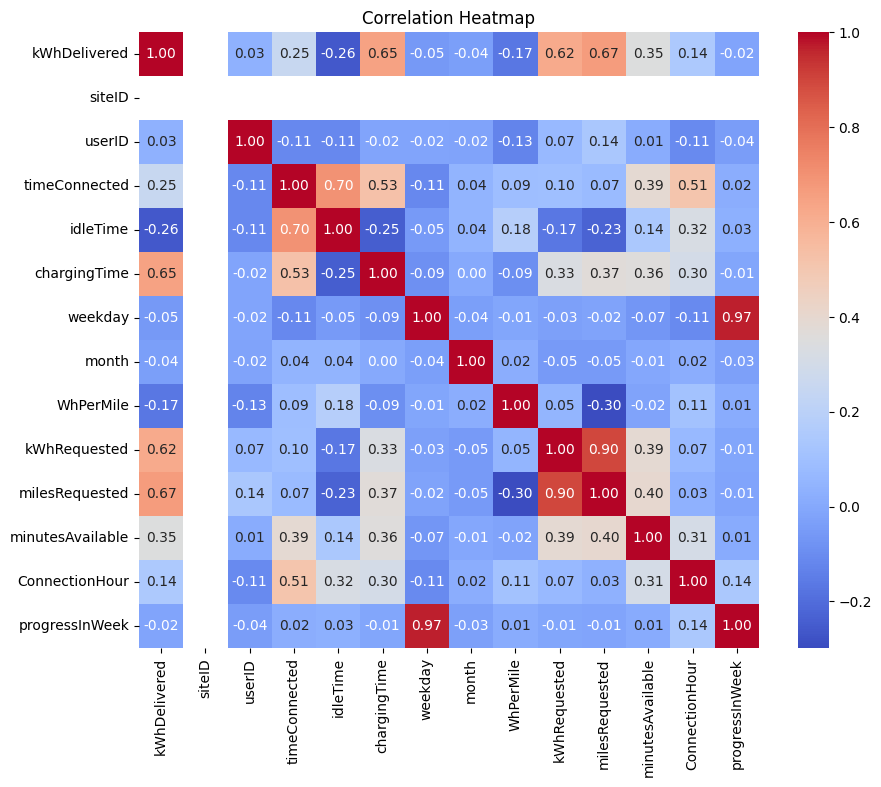

In [116]:
# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()

In [117]:
correlation_matrix

,kWhDelivered,siteID,userID,timeConnected,idleTime,chargingTime,weekday,month,WhPerMile,kWhRequested,milesRequested,minutesAvailable,ConnectionHour,progressInWeek
kWhDelivered,1.000000,NaN,0.032672,0.250753,-0.261999,0.649215,-0.054822,-0.035264,-0.168761,0.615045,0.669215,0.347006,0.143680,-0.018934
siteID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userID,0.032672,NaN,1.000000,-0.112468,-0.112922,-0.018039,-0.015507,-0.020335,-0.127450,0.069796,0.136136,0.011342,-0.109127,-0.042730
timeConnected,0.250753,NaN,-0.112468,1.000000,0.696191,0.525292,-0.110987,0.041912,0.088008,0.096972,0.073162,0.388307,0.509178,0.016566
idleTime,-0.261999,NaN,-0.112922,0.696191,1.000000,-0.245137,-0.051445,0.044063,0.180292,-0.169871,-0.227758,0.139979,0.324305,0.029880
chargingTime,0.649215,NaN,-0.018039,0.525292,-0.245137,1.000000,-0.088910,0.004374,-0.094854,0.332323,0.368784,0.358494,0.303242,-0.013046
weekday,-0.054822,NaN,-0.015507,-0.110987,-0.051445,-0.088910,1.000000,-0.035669,-0.012587,-0.030313,-0.022865,-0.069104,-0.107341,0.968655
month,-0.035264,NaN,-0.020335,0.041912,0.044063,0.004374,-0.035669,1.000000,0.017888,-0.052861,-0.052442,-0.008348,0.020335,-0.030524
WhPerMile,-0.168761,NaN,-0.127450,0.088008,0.180292,-0.094854,-0.012587,0.017888,1.000000,0.048444,-0.298117,-0.024249,0.108488,0.014683
kWhRequested,0.615045,NaN,0.069796,0.096972,-0.169871,0.332323,-0.030313,-0.052861,0.048444,1.000000,0.895148,0.388511,0.070169,-0.012870


In [118]:
numeric_data.drop(['siteID'], axis=1, inplace=True)
numeric_data.drop(['userID'], axis=1, inplace=True)
numeric_data.drop(['idleTime'], axis=1, inplace=True)
numeric_data.drop(['chargingTime'], axis=1, inplace=True)
numeric_data.drop(['month'], axis=1, inplace=True)
numeric_data.drop(['milesRequested'], axis=1, inplace=True)
numeric_data.drop(['kWhRequested'], axis=1, inplace=True)
numeric_data.drop(['WhPerMile'], axis=1, inplace=True)
numeric_data.drop(['minutesAvailable'], axis=1, inplace=True)
numeric_data.drop(['ConnectionHour'], axis=1, inplace=True)
numeric_data.drop(['weekday'], axis=1, inplace=True)
numeric_data

,kWhDelivered,timeConnected,progressInWeek
0,25.016,21741.0,0.554365
1,33.097,32491.0,0.557143
2,6.521,38567.0,0.559127
3,2.355,9521.0,0.559425
4,13.375,29319.0,0.559524
...,...,...,...
56531,6.048,19889.0,0.019147
56532,41.047,26107.0,0.022123
56533,5.390,14182.0,0.027183
56534,8.399,13686.0,0.034623


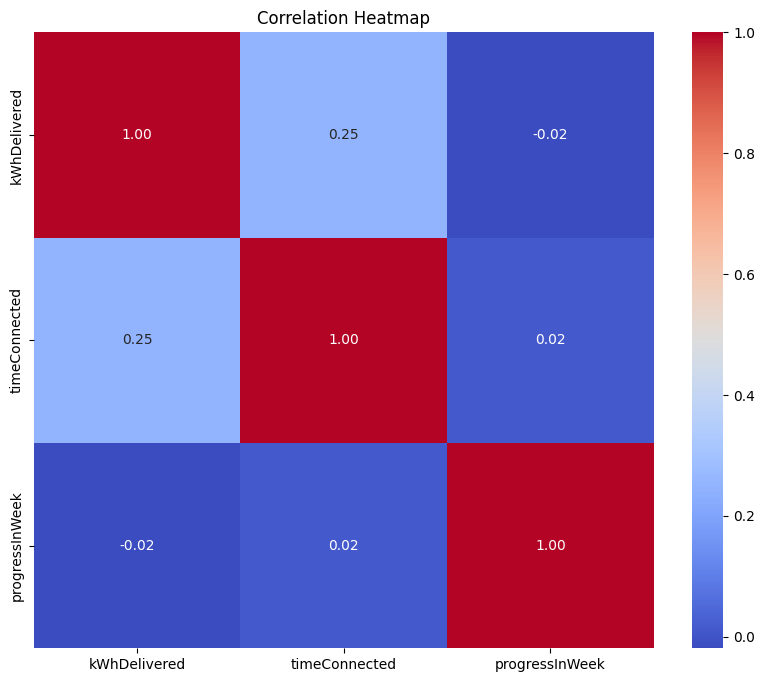

In [119]:
# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()

In [120]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(numeric_data)
numeric_data_scaled = scaler.transform(numeric_data)
numeric_data_scaled_df = pd.DataFrame(numeric_data_scaled, columns=numeric_data.columns, index=numeric_data.index)
numeric_data_scaled_df.head()

,kWhDelivered,timeConnected,progressInWeek
0,0.368794,0.073906,0.554585
1,0.490371,0.110760,0.557364
2,0.090540,0.131590,0.559349
3,0.027863,0.032013,0.559647
4,0.193657,0.099885,0.559746


In [121]:
from sklearn.cluster import KMeans

In [122]:
k_max = 25  # We have a lot of datapoints, however more than 25 clusters are definitely
            # not reasonable!

In [123]:
#These lines initialize two empty lists to store the number of clusters (clusters) and the
#corresponding inertia (sum of squared distances to the nearest cluster center) for each k value (losses)
clusters = []
losses = []

#This is a loop that iterates over different values of k
for k in range(k_max):
    #For each k, a new instance of the KMeans clustering algorithm is created. The n_clusters parameter is set to k+1 to specify the number of clusters, and n_init='auto' indicates
    #that the algorithm should automatically choose the number of initializations for the centroids
    model = KMeans(n_clusters=k+1, n_init='auto')
    model.fit(numeric_data_scaled)
    clusters.append(k+1)

    #The inertia of the fitted model is calculated using the inertia_ attribute, representing the sum of squared distances to the nearest cluster center.
    #This value is then appended to the losses list
    losses.append(model.inertia_)

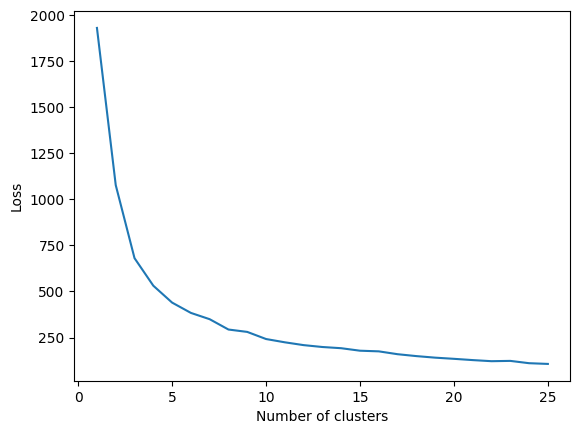

In [124]:
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

(0.0, 15.0)

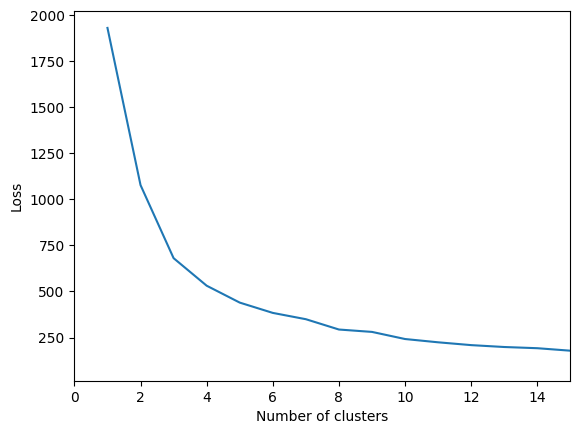

In [125]:
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.xlim([0,15])

(0.0, 6.0)

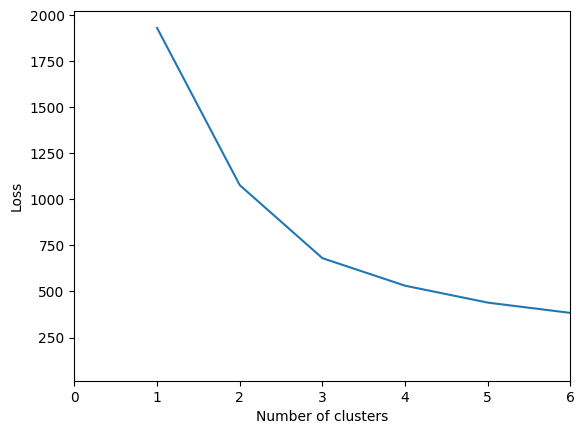

In [126]:
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.xlim([0,6])

(0.0, 6.0)

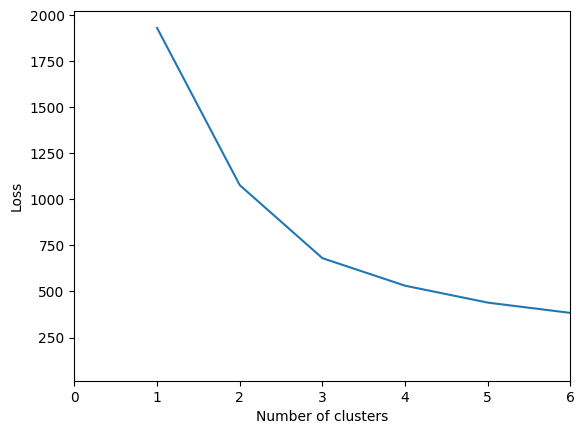

In [127]:
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.xlim([0,6])

In [128]:
two_means = KMeans(n_clusters=2, n_init='auto')
two_means.fit(numeric_data_scaled)

KMeans(n_clusters=2, n_init='auto')

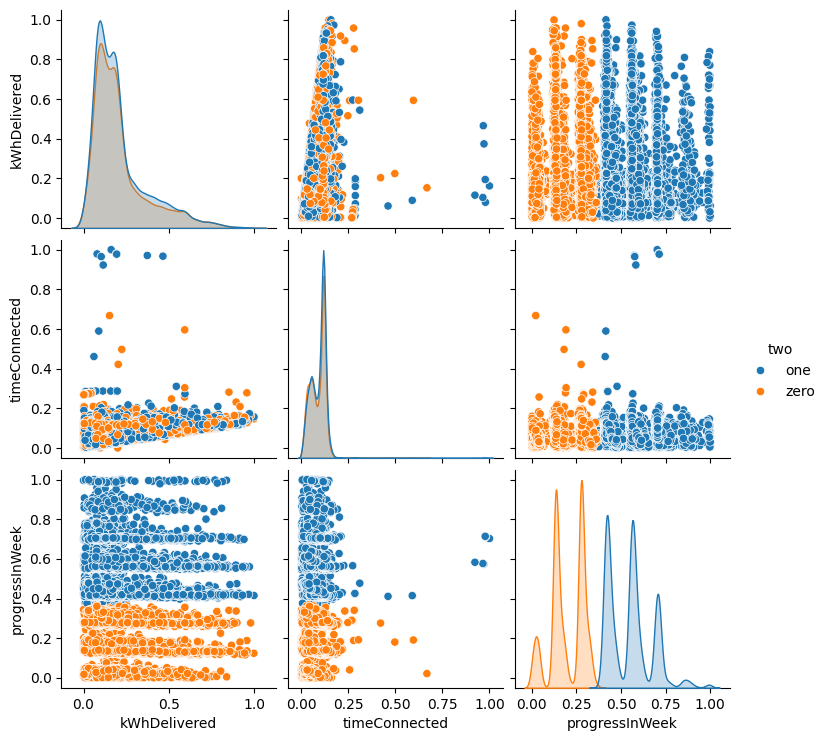

In [129]:
numbers = ["zero", "one", "two", "three", "four", "five"]

sessions_scaled = numeric_data_scaled_df.copy()
sessions_scaled["two"] = two_means.predict(numeric_data_scaled)
sessions_scaled["two"] = sessions_scaled["two"].apply(lambda x: numbers[x])
sns.pairplot(data=sessions_scaled, hue="two")

In [130]:
three_means = KMeans(n_clusters=3, n_init='auto')
three_means.fit(numeric_data_scaled)

KMeans(n_clusters=3, n_init='auto')

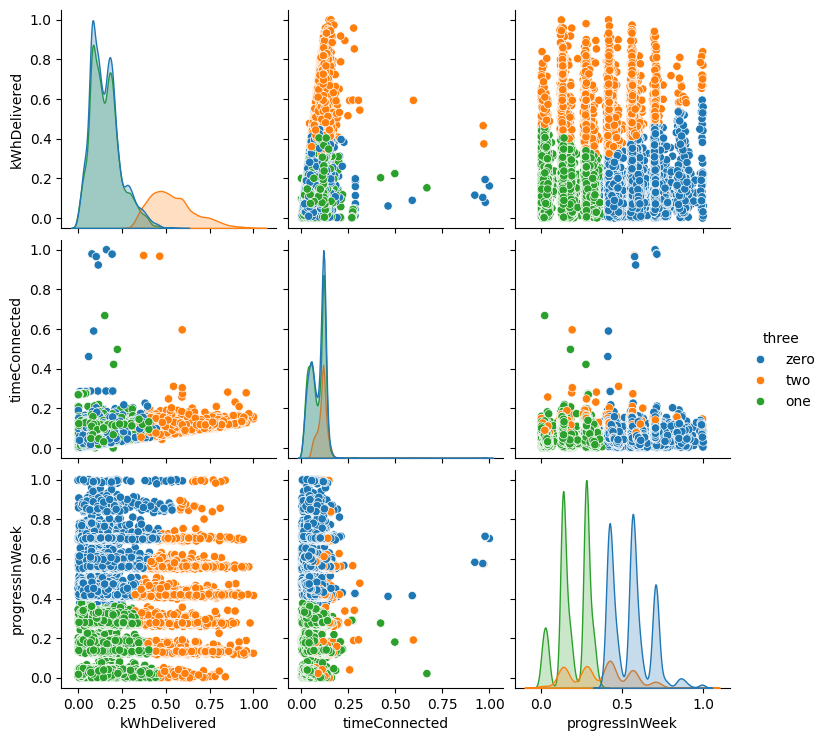

In [131]:
sessions_scaled["three"] = three_means.predict(numeric_data_scaled)
sessions_scaled["three"] = sessions_scaled["three"].apply(lambda x: numbers[x])
sns.pairplot(data=sessions_scaled, hue="three")

In [132]:
four_means = KMeans(n_clusters=4, n_init='auto')
four_means.fit(numeric_data_scaled)

KMeans(n_clusters=4, n_init='auto')

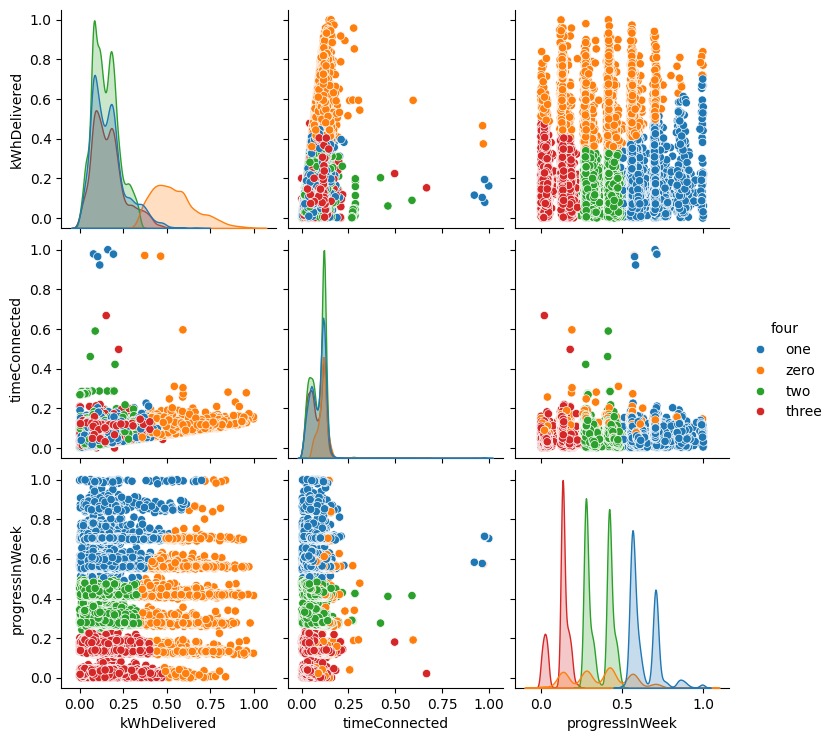

In [133]:
sessions_scaled["four"] = four_means.predict(numeric_data_scaled)
sessions_scaled["four"] = sessions_scaled["four"].apply(lambda x: numbers[x])
sns.pairplot(data=sessions_scaled, hue="four")

In [134]:
five_means = KMeans(n_clusters=5, n_init='auto')
five_means.fit(numeric_data_scaled)

KMeans(n_clusters=5, n_init='auto')

In [ ]:
sessions_scaled["five"] = five_means.predict(numeric_data_scaled)
sessions_scaled["five"] = sessions_scaled["five"].apply(lambda x: numbers[x])
sns.pairplot(data=sessions_scaled, hue="five")

In [ ]:
# TODO: Change implementation for use case
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    #The children_ attribute of the AgglomerativeClustering model contains an array representing the hierarchical clustering. Each row in this
    #array corresponds to a newly formed cluster, and the two columns contain the indices of the two clusters that were merged to create it
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    #distance = np.arange(children.shape[0]): Since the actual distances between the clusters are not available, a simple array of distances is created using np.arange(children.shape[0]).
    #This is done to simulate the distances between merged clusters and is mainly used for plotting purposes
    distance = np.arange(children.shape[0])

    

    # The number of observations contained in each cluster level
    #This array represents the number of observations contained in each cluster level.
    #It starts from 2 and goes up to children.shape[0]+1, as the number of observations in each cluster level is increasing with each merge
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


agglo = AgglomerativeClustering(n_clusters=3) #The number of clusters to find
y_pred_agglo = agglo.fit_predict(numeric_data_scaled)

plt.figure(figsize=(15,10))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(agglo, labels=agglo.labels_)
plt.ylabel("Distance")
plt.show()

In [ ]:
# TODO: Change implementation for use case
iris["Agglo"] = y_pred_agglo

fig, ax = plt.subplots(1,2, figsize=(9,5))
sns.scatterplot(ax=ax[0], x="Sepal.Length", y="Petal.Width", data=iris, hue="Agglo")
sns.scatterplot(ax=ax[1], x="Sepal.Length", y="Petal.Width", hue="Species", data=iris)